# Importer les bibliothèques nécessaires


In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm
import numpy as np


In [10]:
# Charger le dataset Iris
iris = sns.load_dataset('iris')


In [11]:
# Sélectionner la variable d'intérêt (longueur des sépales)
sepal_length = iris['sepal_length']


# Caractéristiques à calculer pour vérifier la normalité

In [4]:
# Calcul du skewness et du kurtosis
skewness = stats.skew(sepal_length)
kurtosis = stats.kurtosis(sepal_length,fisher=False)#Vrai kurtosis
excess_kurtosis = stats.kurtosis(sepal_length)#Vrai kurtosis
print(f"Skewness: {skewness}")
print(f"Kurtosis réel: {kurtosis}")
print(f"Excès de kurtosis: {excess_kurtosis}")


Skewness: 0.3117530585022963
Kurtosis réel: 2.4264320510750235
Excès de kurtosis: -0.5735679489249765


# Analyses Graphiques pour vérifier la normalité

## Histogramme et courbe de densité

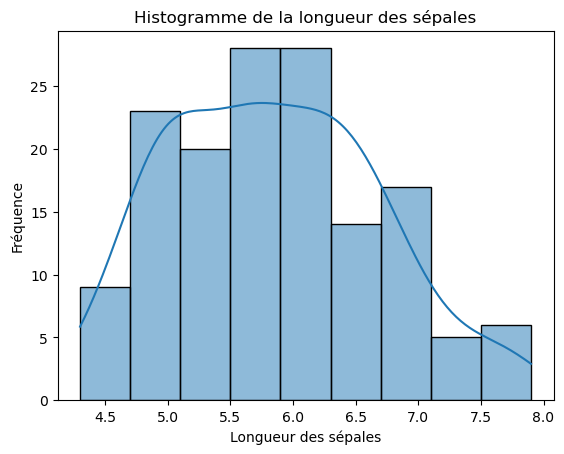

In [5]:
# Histogramme
plt.figure()
sns.histplot(sepal_length, kde=True)
plt.title('Histogramme de la longueur des sépales')
plt.xlabel('Longueur des sépales')
plt.ylabel('Fréquence')
plt.show()


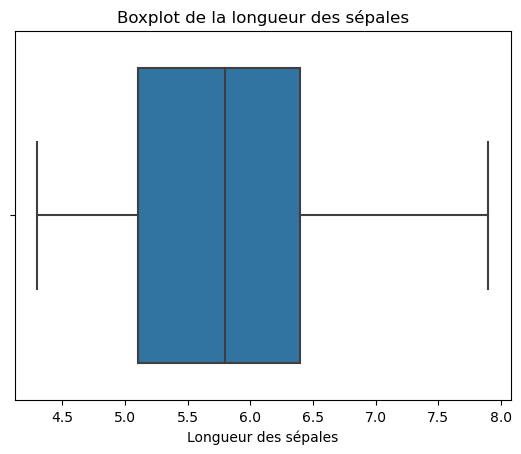

In [6]:
# Boxplot
plt.figure()
sns.boxplot(x=sepal_length)
plt.title('Boxplot de la longueur des sépales')
plt.xlabel('Longueur des sépales')
plt.show()


## Q-Q plot

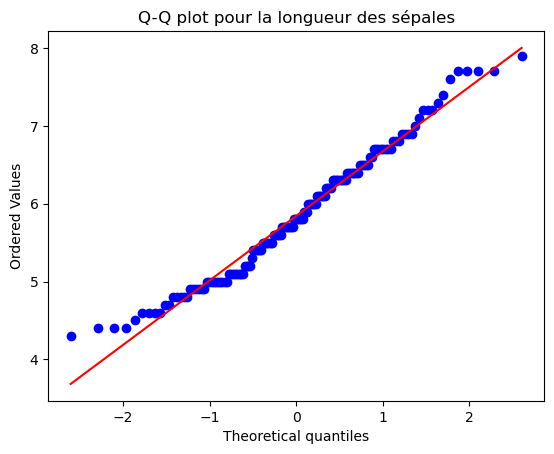

In [7]:
plt.figure()
stats.probplot(sepal_length, plot=plt)
plt.title('Q-Q plot pour la longueur des sépales')
plt.show()

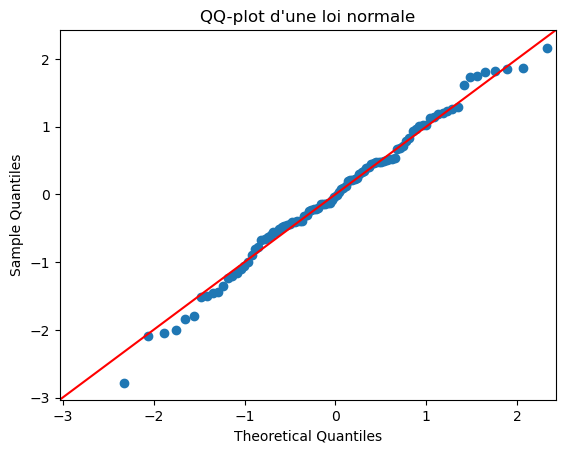

In [8]:
# Générer un échantillon aléatoire à partir d'une distribution normale
np.random.seed(42)
sample = np.random.normal(loc=0, scale=1, size=100)

# Créer le QQ-plot
fig = sm.qqplot(sample, line='45', fit=True)
plt.title("QQ-plot d'une loi normale")
plt.show()

# Utiliser les tests statistiques

| Test                 | Avantages                                                | Inconvénients                                         | Conditions d'utilisation                              |
|:---------------------|:---------------------------------------------------------|:------------------------------------------------------|:---------------------------------------------------|
| Shapiro-Wilk         | - Puissant et précis<br>- Recommandé pour les échantillons de petite taille | - Moins adapté aux grands échantillons  | - Échantillons de petite et moyenne taille           |
|----------------------|----------------------------------------------------------|--------------------------------------------------------|--------------------------------------------------|
| Kolmogorov-Smirnov   | - Peut être utilisé pour des échantillons plus importants | - Moins puissant que le test de Shapiro-Wilk         | - Échantillons de toutes tailles                     |
|----------------------|--------------------------------------------------------|--------------------------------------------------------|------------------------------------------------|
| Lilliefors           | - Adapté aux échantillons de petite taille               | - Moins précis et puissant que le test de Shapiro-Wilk| - Échantillons de petite taille                      |
|----------------------|-----------------------------------------------------------|--------------------------------------------------------|-------------------------------------------------|
| Anderson-Darling     | - Sensible aux écarts dans les queues de la distribution  | - Peut être moins puissant pour les échantillons de petite taille | - Échantillons de toutes tailles                     |
|----------------------|-----------------------------------------------------------|--------------------------------------------------------|-------------------------------------------------|
| D'Agostino-Pearson   | - Détecte les asymétries et variations d'aplatissement   | - Moins puissant que le test de Shapiro-Wilk         | - Échantillons de toutes tailles                     |



In [12]:

# Niveau de signification (alpha)
alpha = 0.05

# Effectuer les tests de normalité
shapiro_test = stats.shapiro(sepal_length)
ks_test = stats.kstest(sepal_length, 'norm')
ad_test = stats.anderson(sepal_length, dist='norm')
dagostino_test = stats.normaltest(sepal_length)
lilliefors_test = lilliefors(sepal_length, dist='norm')

# Créer un tableau pandas avec les résultats des tests
test_results = pd.DataFrame({
    'Nom du test': ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Anderson-Darling', "D'Agostino-Pearson", 'Lilliefors'],
    'Statistique de test': [shapiro_test[0], ks_test.statistic, ad_test.statistic, dagostino_test.statistic, lilliefors_test[0]],
    'p-valeur': [shapiro_test[1], ks_test.pvalue, None, dagostino_test.pvalue, lilliefors_test[1]],
    'Normalité': ['Oui' if shapiro_test[1] > alpha else 'Non',
                  'Oui' if ks_test.pvalue > alpha else 'Non',
                  'Oui' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) else 'Non',
                  'Oui' if dagostino_test.pvalue > alpha else 'Non',
                  'Oui' if lilliefors_test[1] > alpha else 'Non']
})

print(test_results)

          Nom du test  Statistique de test  p-valeur Normalité
0        Shapiro-Wilk             0.976090  0.010180       Non
1  Kolmogorov-Smirnov             0.999991  0.000000       Non
2    Anderson-Darling             0.889199       NaN       Oui
3  D'Agostino-Pearson             5.735584  0.056824       Oui
4          Lilliefors             0.088654  0.010291       Non
